In [50]:
import pandas as pd
import numpy as np

df=pd.read_csv('/kaggle/input/behaviour-sim-data/behaviour_simulation_with_captions.csv')
df.head()

,id,date,likes,content,username,inferred company,url,media_type,media_caption
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,tim hortons,https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?fo...,I,a good morning for breakfast
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,independent,https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?fo...,I,person on the set of tv teen drama
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,cbc,https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?fo...,I,a soldier carries a water bottle to the fire i...
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,williams,https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?fo...,I,people on the beach
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,independent,https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?fo...,I,a man and woman holding a plaque


In [51]:
# !pip install snscrape
# import snscrape.modules.twitter as sntwitter
# import pandas as pd
# from tqdm import tqdm

# Example DataFrame
# df = pd.DataFrame({'username': ['elonmusk', 'BarackObama', 'nasa']})

# # Function to get follower count for a Twitter handle
# def get_follower_count(username):
#     try:
#         if pd.isna(username) or username.strip() == "":
#             return None
#         user = sntwitter.TwitterUserScraper(username.strip()).entity
#         return user.followersCount
#     except Exception as e:
#         print(f"Error fetching '{username}': {e}")
#         return None

# # Ensure usernames don't have '@'
# df['username_cleaned'] = df['username'].str.replace('@', '', regex=False)

# # Get follower counts using tqdm for progress
# df['follower_count'] = [
#     get_follower_count(u) for u in tqdm(df['username_cleaned'])
# ]
# df.head()

In [52]:
metadata = df[['id','date','content','username','inferred company']]
metadata['caption'] = df['media_caption']
metadata.head()

,id,date,content,username,inferred company,caption
0,1,2020-12-12 00:47:00,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,tim hortons,a good morning for breakfast
1,2,2018-06-30 10:04:20,Watch rapper <mention> freestyle for over an H...,IndyMusic,independent,person on the set of tv teen drama
2,3,2020-09-29 19:47:28,Canadian Armenian community demands ban on mil...,CBCCanada,cbc,a soldier carries a water bottle to the fire i...
3,4,2020-10-01 11:40:09,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,williams,people on the beach
4,5,2018-10-19 14:30:46,Congratulations to Pauletha Butts of <mention>...,BGISD,independent,a man and woman holding a plaque


In [53]:
def create_prompt(row):
    
    prompt = f"Following is the information about Twitter post."

    data_description = (f"Caption for Image of post: {row['caption']}, " 
                       f"Text content: {row['content']}, " 
                       f"Inferred company: {row['inferred company']}, " 
                       f"Username: {row['username']}, " 
                       f"Date and time: {row['date']}, " 
                   )

    prompt += data_description
    return prompt

# Apply the function to each row to create prompts
final_task1_company = pd.DataFrame()
final_task1_company['text'] = metadata.apply(create_prompt, axis=1)
final_task1_company['id'] = metadata['id']
final_task1_company.head()

,text,id
0,Following is the information about Twitter pos...,1
1,Following is the information about Twitter pos...,2
2,Following is the information about Twitter pos...,3
3,Following is the information about Twitter pos...,4
4,Following is the information about Twitter pos...,5


In [54]:
import warnings
warnings.filterwarnings("ignore")
import re

# Function to remove emojis using regex
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002700-\U000027BF"  # dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Example DataFrame
# df = pd.DataFrame({"text": ["Hello 😄", "Good luck 🚀", "No emoji here."]})

# Apply the function to the 'text' column
final_task1_company['text'] = final_task1_company['text'].apply(remove_emojis)

In [55]:
#Classifying into 7 buckets
li = []
#Classifying into 7 buckets
li = []
for i in range(len(df)):
    if(df['likes'][i]<=10):
        li.append(0)
    elif(df['likes'][i]<=100):
        li.append(1)
    elif(df['likes'][i]<=300):
        li.append(2)
    elif(df['likes'][i]<=500):
        li.append(3)
    elif(df['likes'][i]<=1000):
        li.append(4)
    elif(df['likes'][i]<=2500):
        li.append(5)
    else:
        li.append(6)
final_task1_company['bucket']  = li
final_task1_company['bucket'] = final_task1_company['bucket'].astype("object")
final_task1_company['likes']=df['likes']
final_task1_company.head()

,text,id,bucket,likes
0,Following is the information about Twitter pos...,1,0,1
1,Following is the information about Twitter pos...,2,6,2750
2,Following is the information about Twitter pos...,3,1,57
3,Following is the information about Twitter pos...,4,2,152
4,Following is the information about Twitter pos...,5,1,41


In [56]:
final_task1_company['bucket'].value_counts()
df=final_task1_company
df.head()

,text,id,bucket,likes
0,Following is the information about Twitter pos...,1,0,1
1,Following is the information about Twitter pos...,2,6,2750
2,Following is the information about Twitter pos...,3,1,57
3,Following is the information about Twitter pos...,4,2,152
4,Following is the information about Twitter pos...,5,1,41


In [57]:
s = pd.get_dummies(df['bucket'],dtype = np.int32)
df = pd.concat([df,s],axis = 1)
df = df.drop(['bucket','likes',],axis =1)
ids = df['id']
df = df.drop(['id'],axis=1)
df

,text,0,1,2,3,4,5,6
0,Following is the information about Twitter pos...,1,0,0,0,0,0,0
1,Following is the information about Twitter pos...,0,0,0,0,0,0,1
2,Following is the information about Twitter pos...,0,1,0,0,0,0,0
3,Following is the information about Twitter pos...,0,0,1,0,0,0,0
4,Following is the information about Twitter pos...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
17326,Following is the information about Twitter pos...,0,1,0,0,0,0,0
17327,Following is the information about Twitter pos...,1,0,0,0,0,0,0
17328,Following is the information about Twitter pos...,0,0,1,0,0,0,0
17329,Following is the information about Twitter pos...,1,0,0,0,0,0,0


In [58]:
df['label'] = df[[0, 1, 2, 3, 4, 5]].idxmax(axis=1)

from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(
#     df,
#     test_size=1000,
#     stratify=df['label'],
#     random_state=42
# )
test_df=df[16000:]
train_df=df[:16000]
train_df=train_df.drop(['label'],axis=1)
test_df=test_df.drop(['label'],axis=1)
train_df

,text,0,1,2,3,4,5,6
0,Following is the information about Twitter pos...,1,0,0,0,0,0,0
1,Following is the information about Twitter pos...,0,0,0,0,0,0,1
2,Following is the information about Twitter pos...,0,1,0,0,0,0,0
3,Following is the information about Twitter pos...,0,0,1,0,0,0,0
4,Following is the information about Twitter pos...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
15995,Following is the information about Twitter pos...,1,0,0,0,0,0,0
15996,Following is the information about Twitter pos...,0,1,0,0,0,0,0
15997,Following is the information about Twitter pos...,1,0,0,0,0,0,0
15998,Following is the information about Twitter pos...,1,0,0,0,0,0,0


In [59]:
labels = [0,1,2,3,4,5,6]
def clean(text):
    text = text.replace("<hyperlink>","").replace("<mention>","")
    return text
train_df['text'] = train_df['text'].apply(lambda x:clean(x))
val=test_df
val['text'] = val['text'].apply(lambda x:clean(x))

In [60]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from transformers import AutoTokenizer, AutoModel
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [61]:
from transformers import AutoTokenizer, AutoModel

In [62]:
val = val.reset_index(drop =True)
x_train =train_df.iloc[:,0]
y_train = train_df.iloc[:,1:]
x_test = val.iloc[:,0]
y_test = val.iloc[:,1:]
X_train = pd.DataFrame()
X_train['text'] = x_train
X_test = pd.DataFrame()
X_test['text'] = x_test

In [63]:
x_test

0       Following is the information about Twitter pos...
1       Following is the information about Twitter pos...
2       Following is the information about Twitter pos...
3       Following is the information about Twitter pos...
4       Following is the information about Twitter pos...
                              ...                        
1326    Following is the information about Twitter pos...
1327    Following is the information about Twitter pos...
1328    Following is the information about Twitter pos...
1329    Following is the information about Twitter pos...
1330    Following is the information about Twitter pos...
Name: text, Length: 1331, dtype: object

In [64]:
from transformers import DistilBertTokenizer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

# Using Pretrained DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Creating Dataset class for Toxic comments and Labels 
class Toxic_Dataset(Dataset):
    def __init__(self, Comments_, Labels_):
        self.comments = Comments_.copy()
        self.labels = Labels_.copy()
        
        self.comments["text"] = self.comments["text"].map(lambda x: tokenizer(x, padding="max_length", truncation=True, return_tensors="pt"))
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        comment = self.comments.loc[idx,"text"]
        label = np.array(self.labels.loc[idx,:])
        
        return comment, label

In [65]:
# Making Training, Testing and Validation of data using Dataset class
Train_data = Toxic_Dataset(X_train, y_train)
Test_data = Toxic_Dataset(X_test, y_test)
Val_data = Toxic_Dataset(X_test, y_test)

# Making datasets into batches 
Train_Loader = DataLoader(Train_data, batch_size=16, shuffle=True)
Test_Loader = DataLoader(Test_data, shuffle=False)        #batch_size=16, 
Val_Loader = DataLoader(Val_data, shuffle=False) 

  0%|          | 13/17331 [47:59<1065:38:39, 221.52s/it]


In [66]:
from transformers import DistilBertForSequenceClassification

Distil_bert = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

Distil_bert.classifier = nn.Sequential(
    nn.Linear(768, 7),
    nn.Softmax(dim=1)
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [67]:
from torch.optim import Adam
from tqdm import tqdm
from torch.nn import BCELoss,NLLLoss,CrossEntropyLoss
from torch.optim.lr_scheduler import StepLR

def train_Model(model,Train_DL, Val_DL, learning_rate, epochs):
    
    #device = 'cpu'
    
    Loss = CrossEntropyLoss()
    #Loss = NLLLoss()
    Optimizer = Adam(params=model.parameters(), lr=learning_rate)
    scheduler = StepLR(Optimizer, step_size=212, gamma=0.1)
    
    model.to(device)
    model.train()
    
    train_acc_epochs = []
    train_loss_epochs = []
    val_acc_epochs = []
    val_loss_epochs = []
    
    for epoch in range(epochs):
        training_loss = {}
        training_accuracy = {}
        validation_loss = {}
        validation_accuracy = {}
        batch = 0
        
        for comments, labels in tqdm(Train_DL):
            
            labels = labels.to(device)
            labels = labels.float()
            masks = comments["attention_mask"].squeeze(1).to(device) # the model used these masks to attend only to the non-padded tokens in the sequence
            input_ids = comments["input_ids"].squeeze(1).to(device) # contains the tokenized and indexed representation for a batch of comments
            # squeeze is used to remove the second dimension which has size 1.
            output = model(input_ids, masks)
            #labels = torch.argmax(labels, dim=1)
            #loss = Loss(output.logits, labels)
            k = (output.logits).float()# vector of logits for each class
            loss = Loss(k, labels) # compute the loss
            
            Optimizer.zero_grad()
            loss.backward()
            Optimizer.step()
            scheduler.step()

            
            batch += 1 
            if batch%10 == 0:
                with torch.no_grad():
                    acc = []
                    op = output.logits
                    #print(op)
                    for lb in range(len(labels)): # note: labels is of shape (batch_size, num_classes(=7))
                        correct = 0
                        idx = torch.argmax(op[lb])
                        if(labels[lb,idx]==1):
                            correct =1
                        
                        acc.append(correct)
#                     for lb in range(len(labels)): # note: labels is of shape (batch_size, num_classes(=7))
#                         correct = 0
#                         idx = torch.argmax(op[lb])
#                         if(idx == labels[lb]):
#                             correct =1
                        
#                         acc.append(correct)

                    training_loss[batch] = loss.item()
                    training_accuracy[batch] = sum(acc)/len(acc)
                    print(f"Epoch:{epoch+1} | batch no:{batch}/{len(Train_DL)} | Loss:{loss.item():.4f} | Accuracy:{sum(acc)/len(acc):.4f}")
        
                    # Testing model on validation Data
                    accVal = []
                    val_loss = 0
                    for comments, label in Val_DL:
                        label = label.to(device)
                        label = label.float()
                        masks = comments["attention_mask"].squeeze(1).to(device)
                        input_ids = comments["input_ids"].squeeze(1).to(device)
    
                        output = model(input_ids, masks)
                        #label = torch.argmax(label, dim=1)
                        loss = Loss(output.logits, label)
            
                        val_loss += loss.item()
            
                        op = output.logits
                        correct_val = 0
                        for lb in range(len(label)): # note: labels is of shape (batch_size, num_classes(=7))
                            correct_val = 0
                            idx = torch.argmax(op[lb])
                            if(label[lb,idx]==1):
                                correct_val =1
                        
                                #print(lb,idx,torch.argmax(label[lb]))
                            accVal.append(correct_val)
#                         for lb in range(len(label)):
#                             correct_val = 0
#                             idx = torch.argmax(op[lb])
#                             if(idx == label[lb]):
#                                 correct_val =1
                        
#                                 #print(lb,idx,torch.argmax(label[lb]))
#                             accVal.append(correct_val)
                    
                    validation_loss[batch] = val_loss/len(Val_DL)
                    validation_accuracy[batch] = sum(accVal)/len(accVal)
                    print(f" Validation Loss:{val_loss/len(Val_DL):.4f} | Validation Accuracy:{sum(accVal)/len(accVal):.4f}")
            
        train_acc_epochs.append(training_accuracy)
        train_loss_epochs.append(training_loss)
        val_acc_epochs.append(validation_accuracy)
        val_loss_epochs.append(validation_loss)
    torch.save(model.state_dict(), 'model_state_dict.pth')
    return train_acc_epochs, train_loss_epochs, val_acc_epochs, val_loss_epochs

In [68]:
TA, TL, VA, VL = train_Model(Distil_bert, Train_Loader, Val_Loader, learning_rate=0.0001, epochs=1)

  1%|          | 9/1000 [00:04<08:02,  2.05it/s]

Epoch:1 | batch no:10/1000 | Loss:1.7768 | Accuracy:0.4375


  1%|          | 10/1000 [00:18<1:20:14,  4.86s/it]

 Validation Loss:1.8329 | Validation Accuracy:0.3411


  2%|▏         | 19/1000 [00:22<11:54,  1.37it/s]  

Epoch:1 | batch no:20/1000 | Loss:1.8474 | Accuracy:0.3125


  2%|▏         | 20/1000 [00:37<1:19:30,  4.87s/it]

 Validation Loss:1.8186 | Validation Accuracy:0.3411


  3%|▎         | 29/1000 [00:41<11:55,  1.36it/s]  

Epoch:1 | batch no:30/1000 | Loss:1.8843 | Accuracy:0.3750


  3%|▎         | 30/1000 [00:56<1:18:34,  4.86s/it]

 Validation Loss:1.7459 | Validation Accuracy:0.4305


  4%|▍         | 39/1000 [01:00<11:48,  1.36it/s]  

Epoch:1 | batch no:40/1000 | Loss:1.6560 | Accuracy:0.6250


  4%|▍         | 40/1000 [01:15<1:17:56,  4.87s/it]

 Validation Loss:1.6853 | Validation Accuracy:0.4771


  5%|▍         | 49/1000 [01:19<11:41,  1.36it/s]  

Epoch:1 | batch no:50/1000 | Loss:1.7367 | Accuracy:0.4375


  5%|▌         | 50/1000 [01:33<1:16:57,  4.86s/it]

 Validation Loss:1.6778 | Validation Accuracy:0.4816


  6%|▌         | 59/1000 [01:37<11:33,  1.36it/s]  

Epoch:1 | batch no:60/1000 | Loss:1.4889 | Accuracy:0.6875


  6%|▌         | 60/1000 [01:52<1:16:07,  4.86s/it]

 Validation Loss:1.7053 | Validation Accuracy:0.4583


  7%|▋         | 69/1000 [01:56<11:25,  1.36it/s]  

Epoch:1 | batch no:70/1000 | Loss:1.6425 | Accuracy:0.5000


  7%|▋         | 70/1000 [02:11<1:15:08,  4.85s/it]

 Validation Loss:1.6703 | Validation Accuracy:0.4861


  8%|▊         | 79/1000 [02:15<11:19,  1.35it/s]  

Epoch:1 | batch no:80/1000 | Loss:1.7017 | Accuracy:0.3750


  8%|▊         | 80/1000 [02:29<1:14:15,  4.84s/it]

 Validation Loss:1.6611 | Validation Accuracy:0.5101


  9%|▉         | 89/1000 [02:33<11:12,  1.36it/s]  

Epoch:1 | batch no:90/1000 | Loss:1.6105 | Accuracy:0.5625


  9%|▉         | 90/1000 [02:48<1:13:45,  4.86s/it]

 Validation Loss:1.6393 | Validation Accuracy:0.5214


 10%|▉         | 99/1000 [02:52<11:03,  1.36it/s]  

Epoch:1 | batch no:100/1000 | Loss:1.6895 | Accuracy:0.5000


 10%|█         | 100/1000 [03:07<1:12:42,  4.85s/it]

 Validation Loss:1.6465 | Validation Accuracy:0.5079


 11%|█         | 109/1000 [03:11<10:56,  1.36it/s]  

Epoch:1 | batch no:110/1000 | Loss:1.5565 | Accuracy:0.6250


 11%|█         | 110/1000 [03:26<1:12:18,  4.88s/it]

 Validation Loss:1.6198 | Validation Accuracy:0.5485


 12%|█▏        | 119/1000 [03:30<10:51,  1.35it/s]  

Epoch:1 | batch no:120/1000 | Loss:1.5413 | Accuracy:0.6875


 12%|█▏        | 120/1000 [03:44<1:11:14,  4.86s/it]

 Validation Loss:1.6323 | Validation Accuracy:0.5297


 13%|█▎        | 129/1000 [03:48<10:42,  1.36it/s]  

Epoch:1 | batch no:130/1000 | Loss:1.7127 | Accuracy:0.4375


 13%|█▎        | 130/1000 [04:03<1:10:17,  4.85s/it]

 Validation Loss:1.6331 | Validation Accuracy:0.5244


 14%|█▍        | 139/1000 [04:07<10:34,  1.36it/s]  

Epoch:1 | batch no:140/1000 | Loss:1.7603 | Accuracy:0.3750


 14%|█▍        | 140/1000 [04:22<1:09:34,  4.85s/it]

 Validation Loss:1.6885 | Validation Accuracy:0.4613


 15%|█▍        | 149/1000 [04:26<10:27,  1.36it/s]  

Epoch:1 | batch no:150/1000 | Loss:1.5926 | Accuracy:0.5625


 15%|█▌        | 150/1000 [04:41<1:08:43,  4.85s/it]

 Validation Loss:1.6107 | Validation Accuracy:0.5440


 16%|█▌        | 159/1000 [04:45<10:20,  1.35it/s]  

Epoch:1 | batch no:160/1000 | Loss:1.6027 | Accuracy:0.5625


 16%|█▌        | 160/1000 [04:59<1:07:53,  4.85s/it]

 Validation Loss:1.6021 | Validation Accuracy:0.5620


 17%|█▋        | 169/1000 [05:03<10:13,  1.36it/s]  

Epoch:1 | batch no:170/1000 | Loss:1.7152 | Accuracy:0.4375


 17%|█▋        | 170/1000 [05:18<1:07:03,  4.85s/it]

 Validation Loss:1.6189 | Validation Accuracy:0.5387


 18%|█▊        | 179/1000 [05:22<10:05,  1.36it/s]  

Epoch:1 | batch no:180/1000 | Loss:1.6893 | Accuracy:0.4375


 18%|█▊        | 180/1000 [05:37<1:06:05,  4.84s/it]

 Validation Loss:1.5757 | Validation Accuracy:0.5860


 19%|█▉        | 189/1000 [05:41<09:57,  1.36it/s]  

Epoch:1 | batch no:190/1000 | Loss:1.7540 | Accuracy:0.3750


 19%|█▉        | 190/1000 [05:55<1:05:21,  4.84s/it]

 Validation Loss:1.5869 | Validation Accuracy:0.5733


 20%|█▉        | 199/1000 [05:59<09:49,  1.36it/s]  

Epoch:1 | batch no:200/1000 | Loss:1.4512 | Accuracy:0.6875


 20%|██        | 200/1000 [06:14<1:04:34,  4.84s/it]

 Validation Loss:1.5732 | Validation Accuracy:0.5898


 21%|██        | 209/1000 [06:18<09:42,  1.36it/s]  

Epoch:1 | batch no:210/1000 | Loss:1.4844 | Accuracy:0.6875


 21%|██        | 210/1000 [06:33<1:03:41,  4.84s/it]

 Validation Loss:1.5654 | Validation Accuracy:0.6011


 22%|██▏       | 219/1000 [06:37<09:35,  1.36it/s]  

Epoch:1 | batch no:220/1000 | Loss:1.6624 | Accuracy:0.5000


 22%|██▏       | 220/1000 [06:52<1:03:26,  4.88s/it]

 Validation Loss:1.5651 | Validation Accuracy:0.5995


 23%|██▎       | 229/1000 [06:56<09:27,  1.36it/s]  

Epoch:1 | batch no:230/1000 | Loss:1.5040 | Accuracy:0.6875


 23%|██▎       | 230/1000 [07:10<1:02:11,  4.85s/it]

 Validation Loss:1.5633 | Validation Accuracy:0.6011


 24%|██▍       | 239/1000 [07:14<09:20,  1.36it/s]  

Epoch:1 | batch no:240/1000 | Loss:1.8524 | Accuracy:0.3125


 24%|██▍       | 240/1000 [07:29<1:01:23,  4.85s/it]

 Validation Loss:1.5622 | Validation Accuracy:0.5995


 25%|██▍       | 249/1000 [07:33<09:14,  1.35it/s]  

Epoch:1 | batch no:250/1000 | Loss:1.4309 | Accuracy:0.7500


 25%|██▌       | 250/1000 [07:48<1:00:32,  4.84s/it]

 Validation Loss:1.5606 | Validation Accuracy:0.6033


 26%|██▌       | 259/1000 [07:52<09:06,  1.36it/s]  

Epoch:1 | batch no:260/1000 | Loss:1.5234 | Accuracy:0.6250


 26%|██▌       | 260/1000 [08:06<59:43,  4.84s/it]

 Validation Loss:1.5596 | Validation Accuracy:0.6063


 27%|██▋       | 269/1000 [08:10<08:59,  1.36it/s]

Epoch:1 | batch no:270/1000 | Loss:1.6578 | Accuracy:0.5000


 27%|██▋       | 270/1000 [08:25<58:55,  4.84s/it]

 Validation Loss:1.5596 | Validation Accuracy:0.6063


 28%|██▊       | 279/1000 [08:29<08:52,  1.35it/s]

Epoch:1 | batch no:280/1000 | Loss:1.7905 | Accuracy:0.3750


 28%|██▊       | 280/1000 [08:44<58:07,  4.84s/it]

 Validation Loss:1.5601 | Validation Accuracy:0.6048


 29%|██▉       | 289/1000 [08:48<08:44,  1.36it/s]

Epoch:1 | batch no:290/1000 | Loss:1.5439 | Accuracy:0.6250


 29%|██▉       | 290/1000 [09:02<57:21,  4.85s/it]

 Validation Loss:1.5612 | Validation Accuracy:0.6033


 30%|██▉       | 299/1000 [09:06<08:37,  1.36it/s]

Epoch:1 | batch no:300/1000 | Loss:1.4692 | Accuracy:0.6875


 30%|███       | 300/1000 [09:21<56:30,  4.84s/it]

 Validation Loss:1.5599 | Validation Accuracy:0.6063


 31%|███       | 309/1000 [09:25<08:28,  1.36it/s]

Epoch:1 | batch no:310/1000 | Loss:1.4178 | Accuracy:0.7500


 31%|███       | 310/1000 [09:40<55:38,  4.84s/it]

 Validation Loss:1.5585 | Validation Accuracy:0.6048


 32%|███▏      | 319/1000 [09:44<08:23,  1.35it/s]

Epoch:1 | batch no:320/1000 | Loss:1.4803 | Accuracy:0.6875


 32%|███▏      | 320/1000 [09:59<54:50,  4.84s/it]

 Validation Loss:1.5588 | Validation Accuracy:0.6071


 33%|███▎      | 329/1000 [10:03<08:13,  1.36it/s]

Epoch:1 | batch no:330/1000 | Loss:1.4890 | Accuracy:0.6875


 33%|███▎      | 330/1000 [10:17<54:00,  4.84s/it]

 Validation Loss:1.5580 | Validation Accuracy:0.6056


 34%|███▍      | 339/1000 [10:21<08:06,  1.36it/s]

Epoch:1 | batch no:340/1000 | Loss:1.5985 | Accuracy:0.5625


 34%|███▍      | 340/1000 [10:36<53:13,  4.84s/it]

 Validation Loss:1.5536 | Validation Accuracy:0.6116


 35%|███▍      | 349/1000 [10:40<08:00,  1.36it/s]

Epoch:1 | batch no:350/1000 | Loss:1.4603 | Accuracy:0.6875


 35%|███▌      | 350/1000 [10:55<52:23,  4.84s/it]

 Validation Loss:1.5512 | Validation Accuracy:0.6168


 36%|███▌      | 359/1000 [10:59<07:51,  1.36it/s]

Epoch:1 | batch no:360/1000 | Loss:1.5696 | Accuracy:0.6250


 36%|███▌      | 360/1000 [11:13<51:37,  4.84s/it]

 Validation Loss:1.5529 | Validation Accuracy:0.6123


 37%|███▋      | 369/1000 [11:17<07:44,  1.36it/s]

Epoch:1 | batch no:370/1000 | Loss:1.4186 | Accuracy:0.7500


 37%|███▋      | 370/1000 [11:32<50:46,  4.84s/it]

 Validation Loss:1.5526 | Validation Accuracy:0.6116


 38%|███▊      | 379/1000 [11:36<07:37,  1.36it/s]

Epoch:1 | batch no:380/1000 | Loss:1.7353 | Accuracy:0.4375


 38%|███▊      | 380/1000 [11:51<49:59,  4.84s/it]

 Validation Loss:1.5515 | Validation Accuracy:0.6131


 39%|███▉      | 389/1000 [11:55<07:30,  1.36it/s]

Epoch:1 | batch no:390/1000 | Loss:1.6027 | Accuracy:0.5625


 39%|███▉      | 390/1000 [12:09<49:12,  4.84s/it]

 Validation Loss:1.5519 | Validation Accuracy:0.6138


 40%|███▉      | 399/1000 [12:13<07:22,  1.36it/s]

Epoch:1 | batch no:400/1000 | Loss:1.6018 | Accuracy:0.5625


 40%|████      | 400/1000 [12:28<48:20,  4.83s/it]

 Validation Loss:1.5529 | Validation Accuracy:0.6108


 41%|████      | 409/1000 [12:32<07:14,  1.36it/s]

Epoch:1 | batch no:410/1000 | Loss:1.8150 | Accuracy:0.3750


 41%|████      | 410/1000 [12:47<47:34,  4.84s/it]

 Validation Loss:1.5504 | Validation Accuracy:0.6138


 42%|████▏     | 419/1000 [12:51<07:08,  1.36it/s]

Epoch:1 | batch no:420/1000 | Loss:1.5410 | Accuracy:0.6250


 42%|████▏     | 420/1000 [13:05<46:45,  4.84s/it]

 Validation Loss:1.5507 | Validation Accuracy:0.6146


 43%|████▎     | 429/1000 [13:09<06:59,  1.36it/s]

Epoch:1 | batch no:430/1000 | Loss:1.4810 | Accuracy:0.6875


 43%|████▎     | 430/1000 [13:24<45:57,  4.84s/it]

 Validation Loss:1.5563 | Validation Accuracy:0.6071


 44%|████▍     | 439/1000 [13:28<06:53,  1.36it/s]

Epoch:1 | batch no:440/1000 | Loss:1.4824 | Accuracy:0.6875


 44%|████▍     | 440/1000 [13:43<45:10,  4.84s/it]

 Validation Loss:1.5560 | Validation Accuracy:0.6078


 45%|████▍     | 449/1000 [13:47<06:46,  1.36it/s]

Epoch:1 | batch no:450/1000 | Loss:1.5882 | Accuracy:0.5625


 45%|████▌     | 450/1000 [14:01<44:22,  4.84s/it]

 Validation Loss:1.5574 | Validation Accuracy:0.6078


 46%|████▌     | 459/1000 [14:05<06:39,  1.36it/s]

Epoch:1 | batch no:460/1000 | Loss:1.6022 | Accuracy:0.5625


 46%|████▌     | 460/1000 [14:20<43:33,  4.84s/it]

 Validation Loss:1.5545 | Validation Accuracy:0.6108


 47%|████▋     | 469/1000 [14:24<06:31,  1.36it/s]

Epoch:1 | batch no:470/1000 | Loss:1.4878 | Accuracy:0.6875


 47%|████▋     | 470/1000 [14:39<42:44,  4.84s/it]

 Validation Loss:1.5533 | Validation Accuracy:0.6116


 48%|████▊     | 479/1000 [14:43<06:24,  1.35it/s]

Epoch:1 | batch no:480/1000 | Loss:1.5095 | Accuracy:0.6250


 48%|████▊     | 480/1000 [14:57<41:55,  4.84s/it]

 Validation Loss:1.5532 | Validation Accuracy:0.6131


 49%|████▉     | 489/1000 [15:01<06:15,  1.36it/s]

Epoch:1 | batch no:490/1000 | Loss:1.4774 | Accuracy:0.6875


 49%|████▉     | 490/1000 [15:16<41:11,  4.85s/it]

 Validation Loss:1.5534 | Validation Accuracy:0.6108


 50%|████▉     | 499/1000 [15:20<06:09,  1.36it/s]

Epoch:1 | batch no:500/1000 | Loss:1.4199 | Accuracy:0.7500


 50%|█████     | 500/1000 [15:35<40:20,  4.84s/it]

 Validation Loss:1.5542 | Validation Accuracy:0.6093


 51%|█████     | 509/1000 [15:39<06:02,  1.36it/s]

Epoch:1 | batch no:510/1000 | Loss:1.5965 | Accuracy:0.5625


 51%|█████     | 510/1000 [15:53<39:33,  4.84s/it]

 Validation Loss:1.5532 | Validation Accuracy:0.6116


 52%|█████▏    | 519/1000 [15:57<05:54,  1.36it/s]

Epoch:1 | batch no:520/1000 | Loss:1.6608 | Accuracy:0.5000


 52%|█████▏    | 520/1000 [16:12<38:44,  4.84s/it]

 Validation Loss:1.5513 | Validation Accuracy:0.6146


 53%|█████▎    | 529/1000 [16:16<05:46,  1.36it/s]

Epoch:1 | batch no:530/1000 | Loss:1.5391 | Accuracy:0.6250


 53%|█████▎    | 530/1000 [16:31<37:59,  4.85s/it]

 Validation Loss:1.5539 | Validation Accuracy:0.6108


 54%|█████▍    | 539/1000 [16:35<05:40,  1.35it/s]

Epoch:1 | batch no:540/1000 | Loss:1.4139 | Accuracy:0.7500


 54%|█████▍    | 540/1000 [16:50<37:09,  4.85s/it]

 Validation Loss:1.5518 | Validation Accuracy:0.6146


 55%|█████▍    | 549/1000 [16:54<05:32,  1.36it/s]

Epoch:1 | batch no:550/1000 | Loss:1.4187 | Accuracy:0.7500


 55%|█████▌    | 550/1000 [17:08<36:36,  4.88s/it]

 Validation Loss:1.5516 | Validation Accuracy:0.6116


 56%|█████▌    | 559/1000 [17:12<05:25,  1.35it/s]

Epoch:1 | batch no:560/1000 | Loss:1.6006 | Accuracy:0.5625


 56%|█████▌    | 560/1000 [17:27<35:36,  4.86s/it]

 Validation Loss:1.5522 | Validation Accuracy:0.6131


 57%|█████▋    | 569/1000 [17:31<05:17,  1.36it/s]

Epoch:1 | batch no:570/1000 | Loss:1.5938 | Accuracy:0.5625


 57%|█████▋    | 570/1000 [17:46<34:53,  4.87s/it]

 Validation Loss:1.5529 | Validation Accuracy:0.6131


 58%|█████▊    | 579/1000 [17:50<05:12,  1.35it/s]

Epoch:1 | batch no:580/1000 | Loss:1.5361 | Accuracy:0.6250


 58%|█████▊    | 580/1000 [18:05<33:54,  4.85s/it]

 Validation Loss:1.5525 | Validation Accuracy:0.6131


 59%|█████▉    | 589/1000 [18:09<05:02,  1.36it/s]

Epoch:1 | batch no:590/1000 | Loss:1.6026 | Accuracy:0.5625


 59%|█████▉    | 590/1000 [18:23<33:10,  4.85s/it]

 Validation Loss:1.5503 | Validation Accuracy:0.6146


 60%|█████▉    | 599/1000 [18:27<04:55,  1.36it/s]

Epoch:1 | batch no:600/1000 | Loss:1.4716 | Accuracy:0.6875


 60%|██████    | 600/1000 [18:42<32:27,  4.87s/it]

 Validation Loss:1.5517 | Validation Accuracy:0.6116


 61%|██████    | 609/1000 [18:46<04:48,  1.35it/s]

Epoch:1 | batch no:610/1000 | Loss:1.6732 | Accuracy:0.5000


 61%|██████    | 610/1000 [19:01<31:36,  4.86s/it]

 Validation Loss:1.5537 | Validation Accuracy:0.6116


 62%|██████▏   | 619/1000 [19:05<04:41,  1.35it/s]

Epoch:1 | batch no:620/1000 | Loss:1.4740 | Accuracy:0.6875


 62%|██████▏   | 620/1000 [19:20<31:02,  4.90s/it]

 Validation Loss:1.5490 | Validation Accuracy:0.6153


 63%|██████▎   | 629/1000 [19:24<04:34,  1.35it/s]

Epoch:1 | batch no:630/1000 | Loss:1.5935 | Accuracy:0.5625


 63%|██████▎   | 630/1000 [19:38<30:03,  4.87s/it]

 Validation Loss:1.5513 | Validation Accuracy:0.6138


 64%|██████▍   | 639/1000 [19:42<04:26,  1.35it/s]

Epoch:1 | batch no:640/1000 | Loss:1.7278 | Accuracy:0.4375


 64%|██████▍   | 640/1000 [19:57<29:13,  4.87s/it]

 Validation Loss:1.5511 | Validation Accuracy:0.6146


 65%|██████▍   | 649/1000 [20:01<04:18,  1.36it/s]

Epoch:1 | batch no:650/1000 | Loss:1.7223 | Accuracy:0.4375


 65%|██████▌   | 650/1000 [20:16<28:19,  4.86s/it]

 Validation Loss:1.5524 | Validation Accuracy:0.6123


 66%|██████▌   | 659/1000 [20:20<04:11,  1.35it/s]

Epoch:1 | batch no:660/1000 | Loss:1.4130 | Accuracy:0.7500


 66%|██████▌   | 660/1000 [20:35<27:27,  4.85s/it]

 Validation Loss:1.5515 | Validation Accuracy:0.6131


 67%|██████▋   | 669/1000 [20:39<04:03,  1.36it/s]

Epoch:1 | batch no:670/1000 | Loss:1.4802 | Accuracy:0.6875


 67%|██████▋   | 670/1000 [20:53<26:38,  4.85s/it]

 Validation Loss:1.5524 | Validation Accuracy:0.6116


 68%|██████▊   | 679/1000 [20:57<03:56,  1.36it/s]

Epoch:1 | batch no:680/1000 | Loss:1.5266 | Accuracy:0.6250


 68%|██████▊   | 680/1000 [21:12<25:50,  4.85s/it]

 Validation Loss:1.5498 | Validation Accuracy:0.6146


 69%|██████▉   | 689/1000 [21:16<03:49,  1.36it/s]

Epoch:1 | batch no:690/1000 | Loss:1.4899 | Accuracy:0.6875


 69%|██████▉   | 690/1000 [21:31<25:01,  4.84s/it]

 Validation Loss:1.5509 | Validation Accuracy:0.6131


 70%|██████▉   | 699/1000 [21:35<03:41,  1.36it/s]

Epoch:1 | batch no:700/1000 | Loss:1.3563 | Accuracy:0.8125


 70%|███████   | 700/1000 [21:49<24:12,  4.84s/it]

 Validation Loss:1.5519 | Validation Accuracy:0.6146


 71%|███████   | 709/1000 [21:53<03:34,  1.36it/s]

Epoch:1 | batch no:710/1000 | Loss:1.6057 | Accuracy:0.5625


 71%|███████   | 710/1000 [22:08<23:24,  4.84s/it]

 Validation Loss:1.5507 | Validation Accuracy:0.6146


 72%|███████▏  | 719/1000 [22:12<03:27,  1.36it/s]

Epoch:1 | batch no:720/1000 | Loss:1.4571 | Accuracy:0.6875


 72%|███████▏  | 720/1000 [22:27<22:35,  4.84s/it]

 Validation Loss:1.5510 | Validation Accuracy:0.6161


 73%|███████▎  | 729/1000 [22:31<03:19,  1.36it/s]

Epoch:1 | batch no:730/1000 | Loss:1.4817 | Accuracy:0.6875


 73%|███████▎  | 730/1000 [22:45<21:46,  4.84s/it]

 Validation Loss:1.5495 | Validation Accuracy:0.6146


 74%|███████▍  | 739/1000 [22:50<03:11,  1.36it/s]

Epoch:1 | batch no:740/1000 | Loss:1.4702 | Accuracy:0.6875


 74%|███████▍  | 740/1000 [23:04<20:58,  4.84s/it]

 Validation Loss:1.5510 | Validation Accuracy:0.6146


 75%|███████▍  | 749/1000 [23:08<03:04,  1.36it/s]

Epoch:1 | batch no:750/1000 | Loss:1.6651 | Accuracy:0.5000


 75%|███████▌  | 750/1000 [23:23<20:09,  4.84s/it]

 Validation Loss:1.5516 | Validation Accuracy:0.6131


 76%|███████▌  | 759/1000 [23:27<02:57,  1.36it/s]

Epoch:1 | batch no:760/1000 | Loss:1.4893 | Accuracy:0.6875


 76%|███████▌  | 760/1000 [23:42<19:21,  4.84s/it]

 Validation Loss:1.5497 | Validation Accuracy:0.6168


 77%|███████▋  | 769/1000 [23:46<02:50,  1.35it/s]

Epoch:1 | batch no:770/1000 | Loss:1.4537 | Accuracy:0.6875


 77%|███████▋  | 770/1000 [24:00<18:32,  4.84s/it]

 Validation Loss:1.5495 | Validation Accuracy:0.6153


 78%|███████▊  | 779/1000 [24:04<02:42,  1.36it/s]

Epoch:1 | batch no:780/1000 | Loss:1.5583 | Accuracy:0.6250


 78%|███████▊  | 780/1000 [24:19<17:44,  4.84s/it]

 Validation Loss:1.5493 | Validation Accuracy:0.6153


 79%|███████▉  | 789/1000 [24:23<02:35,  1.36it/s]

Epoch:1 | batch no:790/1000 | Loss:1.7286 | Accuracy:0.4375


 79%|███████▉  | 790/1000 [24:38<16:55,  4.84s/it]

 Validation Loss:1.5504 | Validation Accuracy:0.6153


 80%|███████▉  | 799/1000 [24:42<02:28,  1.35it/s]

Epoch:1 | batch no:800/1000 | Loss:1.6535 | Accuracy:0.5000


 80%|████████  | 800/1000 [24:56<16:13,  4.87s/it]

 Validation Loss:1.5516 | Validation Accuracy:0.6123


 81%|████████  | 809/1000 [25:00<02:20,  1.36it/s]

Epoch:1 | batch no:810/1000 | Loss:1.6587 | Accuracy:0.5000


 81%|████████  | 810/1000 [25:15<15:20,  4.85s/it]

 Validation Loss:1.5509 | Validation Accuracy:0.6131


 82%|████████▏ | 819/1000 [25:19<02:13,  1.36it/s]

Epoch:1 | batch no:820/1000 | Loss:1.7075 | Accuracy:0.4375


 82%|████████▏ | 820/1000 [25:34<14:31,  4.84s/it]

 Validation Loss:1.5495 | Validation Accuracy:0.6161


 83%|████████▎ | 829/1000 [25:38<02:05,  1.36it/s]

Epoch:1 | batch no:830/1000 | Loss:1.7015 | Accuracy:0.4375


 83%|████████▎ | 830/1000 [25:52<13:43,  4.85s/it]

 Validation Loss:1.5504 | Validation Accuracy:0.6131


 84%|████████▍ | 839/1000 [25:56<01:58,  1.36it/s]

Epoch:1 | batch no:840/1000 | Loss:1.5388 | Accuracy:0.6250


 84%|████████▍ | 840/1000 [26:11<12:54,  4.84s/it]

 Validation Loss:1.5510 | Validation Accuracy:0.6138


 85%|████████▍ | 849/1000 [26:15<01:51,  1.36it/s]

Epoch:1 | batch no:850/1000 | Loss:1.4177 | Accuracy:0.7500


 85%|████████▌ | 850/1000 [26:30<12:06,  4.84s/it]

 Validation Loss:1.5497 | Validation Accuracy:0.6153


 86%|████████▌ | 859/1000 [26:34<01:44,  1.35it/s]

Epoch:1 | batch no:860/1000 | Loss:1.6807 | Accuracy:0.5000


 86%|████████▌ | 860/1000 [26:48<11:18,  4.84s/it]

 Validation Loss:1.5533 | Validation Accuracy:0.6123


 87%|████████▋ | 869/1000 [26:53<01:36,  1.36it/s]

Epoch:1 | batch no:870/1000 | Loss:1.7855 | Accuracy:0.3750


 87%|████████▋ | 870/1000 [27:07<10:29,  4.84s/it]

 Validation Loss:1.5500 | Validation Accuracy:0.6153


 88%|████████▊ | 879/1000 [27:11<01:29,  1.36it/s]

Epoch:1 | batch no:880/1000 | Loss:1.2967 | Accuracy:0.8750


 88%|████████▊ | 880/1000 [27:26<09:40,  4.84s/it]

 Validation Loss:1.5503 | Validation Accuracy:0.6146


 89%|████████▉ | 889/1000 [27:30<01:22,  1.35it/s]

Epoch:1 | batch no:890/1000 | Loss:1.6377 | Accuracy:0.5000


 89%|████████▉ | 890/1000 [27:45<08:52,  4.84s/it]

 Validation Loss:1.5500 | Validation Accuracy:0.6146


 90%|████████▉ | 899/1000 [27:49<01:14,  1.36it/s]

Epoch:1 | batch no:900/1000 | Loss:1.6645 | Accuracy:0.5000


 90%|█████████ | 900/1000 [28:03<08:04,  4.84s/it]

 Validation Loss:1.5518 | Validation Accuracy:0.6123


 91%|█████████ | 909/1000 [28:07<01:07,  1.36it/s]

Epoch:1 | batch no:910/1000 | Loss:1.7169 | Accuracy:0.4375


 91%|█████████ | 910/1000 [28:22<07:15,  4.84s/it]

 Validation Loss:1.5513 | Validation Accuracy:0.6146


 92%|█████████▏| 919/1000 [28:26<00:59,  1.36it/s]

Epoch:1 | batch no:920/1000 | Loss:1.4166 | Accuracy:0.7500


 92%|█████████▏| 920/1000 [28:41<06:26,  4.84s/it]

 Validation Loss:1.5513 | Validation Accuracy:0.6131


 93%|█████████▎| 929/1000 [28:45<00:52,  1.36it/s]

Epoch:1 | batch no:930/1000 | Loss:1.6097 | Accuracy:0.5625


 93%|█████████▎| 930/1000 [28:59<05:38,  4.84s/it]

 Validation Loss:1.5501 | Validation Accuracy:0.6168


 94%|█████████▍| 939/1000 [29:03<00:44,  1.36it/s]

Epoch:1 | batch no:940/1000 | Loss:1.5443 | Accuracy:0.6250


 94%|█████████▍| 940/1000 [29:18<04:50,  4.84s/it]

 Validation Loss:1.5508 | Validation Accuracy:0.6146


 95%|█████████▍| 949/1000 [29:22<00:37,  1.36it/s]

Epoch:1 | batch no:950/1000 | Loss:1.5400 | Accuracy:0.6250


 95%|█████████▌| 950/1000 [29:37<04:02,  4.84s/it]

 Validation Loss:1.5505 | Validation Accuracy:0.6138


 96%|█████████▌| 959/1000 [29:41<00:30,  1.36it/s]

Epoch:1 | batch no:960/1000 | Loss:1.7863 | Accuracy:0.3750


 96%|█████████▌| 960/1000 [29:55<03:13,  4.84s/it]

 Validation Loss:1.5524 | Validation Accuracy:0.6123


 97%|█████████▋| 969/1000 [29:59<00:22,  1.36it/s]

Epoch:1 | batch no:970/1000 | Loss:1.5385 | Accuracy:0.6250


 97%|█████████▋| 970/1000 [30:14<02:25,  4.84s/it]

 Validation Loss:1.5502 | Validation Accuracy:0.6153


 98%|█████████▊| 979/1000 [30:18<00:15,  1.36it/s]

Epoch:1 | batch no:980/1000 | Loss:1.6017 | Accuracy:0.5625


 98%|█████████▊| 980/1000 [30:33<01:36,  4.84s/it]

 Validation Loss:1.5513 | Validation Accuracy:0.6146


 99%|█████████▉| 989/1000 [30:37<00:08,  1.36it/s]

Epoch:1 | batch no:990/1000 | Loss:1.4143 | Accuracy:0.7500


 99%|█████████▉| 990/1000 [30:51<00:48,  4.84s/it]

 Validation Loss:1.5513 | Validation Accuracy:0.6153


100%|█████████▉| 999/1000 [30:55<00:00,  1.36it/s]

Epoch:1 | batch no:1000/1000 | Loss:1.4041 | Accuracy:0.7500


100%|██████████| 1000/1000 [31:10<00:00,  1.87s/it]

 Validation Loss:1.5522 | Validation Accuracy:0.6123


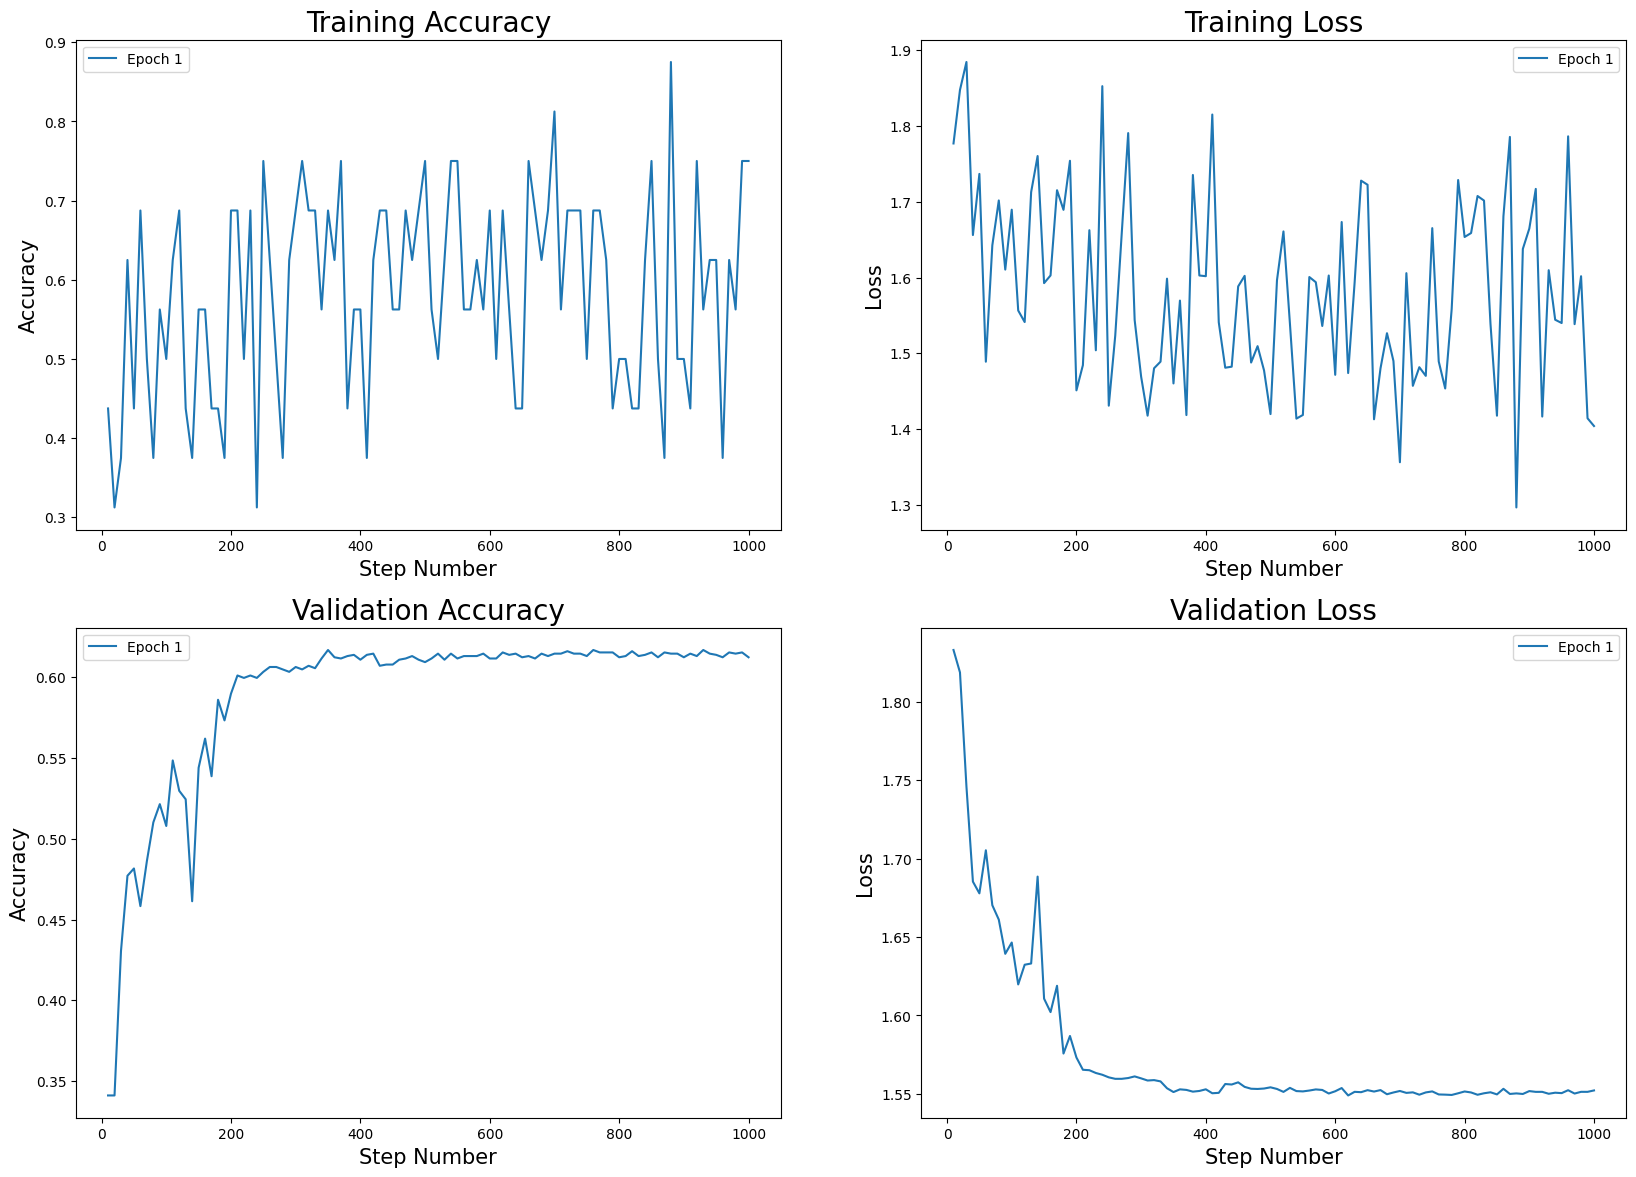

In [71]:
import matplotlib.pyplot as plt
def Acc_Loss_Plot(TA1, TL1, VA1, VL1):
    plt.figure(figsize=(20,14))
    Ac = plt.subplot(2,2,1)
    plt.plot(TA1.keys(), TA1.values())
    #plt.plot(TA2.keys(), TA2.values())
    Ac.set_xlabel("Step Number", fontsize=15)
    Ac.set_ylabel("Accuracy", fontsize=15)
    Ac.set_title("Training Accuracy", fontsize=20)
    Ac.legend(["Epoch 1","Epoch 2"])

    Ls = plt.subplot(2,2,2)
    plt.plot(TL1.keys(), TL1.values())
    #plt.plot(TL2.keys(), TL2.values())
    Ls.set_xlabel("Step Number", fontsize=15)
    Ls.set_ylabel("Loss", fontsize=15)
    Ls.set_title("Training Loss", fontsize=20)
    Ls.legend(["Epoch 1","Epoch 2"])
    
    VAc = plt.subplot(2,2,3)
    plt.plot(VA1.keys(), VA1.values())
    #plt.plot(VA2.keys(), VA2.values())
    VAc.set_xlabel("Step Number", fontsize=15)
    VAc.set_ylabel("Accuracy", fontsize=15)
    VAc.set_title("Validation Accuracy", fontsize=20)
    VAc.legend(["Epoch 1","Epoch 2"])
    
    VLs = plt.subplot(2,2,4)
    plt.plot(VL1.keys(), VL1.values())
    #plt.plot(VL2.keys(), VL2.values())
    VLs.set_xlabel("Step Number", fontsize=15)
    VLs.set_ylabel("Loss", fontsize=15)
    VLs.set_title("Validation Loss", fontsize=20)
    VLs.legend(["Epoch 1","Epoch 2"])

Acc_Loss_Plot(TA[0], TL[0],  VA[0],  VL[0])